# Homework 1


## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).

## The Assignment

### Objectives

You will use TensorFlow to implement several neural network models (labelled Model 1-4, and described in the corresponding sections of the Colab).

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

Hint: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

### Hint 

If you need some extra help, familiarizing yourselves with the dataset and the task of building models in TensorFlow, you can check the [TF tutorial for MNIST](https://www.tensorflow.org/tutorials/mnist/beginners/). 

The tutorial will walk you through the MNIST classification task step-by-step, building and optimizing a model in TensorFlow. 

(Please do not copy the provided code, though. Walk through the tutorial, but write your own implementation).

# Imports and utility functions (do not modify!)

In [1]:
# Import useful libraries.
import numpy as np
import pprint
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# Global variables.
log_period_samples = 20000
batch_size = 100
input_dim = 784
output_dim = 10

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 4, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, setting in enumerate(results.keys()):
      train_accuracy = results[setting]['train_accuracy']
      test_accuracy = results[setting]['test_accuracy']
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Experiment {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, setting in enumerate(results.keys()):
      train_accuracy = results[setting]['train_accuracy']
      test_accuracy = results[setting]['test_accuracy']
      cell_text[i].append(test_accuracy[-1])
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

# Model 1 (20 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

# Model 2 (20 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

# Model 3 (20 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

# Model 4 (20 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001

# Questions

### Q1 (5 pts): Indicate which of the previous experiments constitute an example of over-fitting. Why is this happening?

### Q2 (5 pts): Indicate which of the previous experiments constitute an example of under-fitting. Why is this happening?

### Q3 (10 pts): How would you prevent over-/under-fitting from happening?

# Solutions

In [2]:
from collections import namedtuple

Setting = namedtuple('Setting', ['epochs', 'step_size'])
Experiment = namedtuple('Experiment', ['model', 'settings'])

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class TrainingHistory(tf.keras.callbacks.Callback):
    """
    https://keras.io/callbacks/#create-a-callback
    https://github.com/keras-team/keras/issues/2548
    https://keras.io/models/model/
    """
    def __init__(self, evaluate):
        self.evaluate = evaluate

    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy = []
        self.test = []
        self.counter = 0

    def on_batch_end(self, batch, logs={}):
        self.counter += 1
        if self.counter % 200 == 0:
            self.losses.append(logs.get('loss'))
            self.accuracy.append(logs.get('acc'))
            self.test.append(self.evaluate())


class Model:
    def __init__(self, model, optimizer, loss, metrics, epochs):
        self.model = model
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = metrics
        self.epochs = epochs
        self.history = TrainingHistory(self.evaluate)
    
    def compile(self):
        self.model.compile(
            optimizer=self.optimizer,
            loss=self.loss,
            metrics=self.metrics
        )
    
    def fit(self, verbose=0):
        return self.model.fit(
            x_train,
            y_train,
            epochs=self.epochs,
            batch_size=100,
            verbose=verbose,
            callbacks=[self.history],
            validation_data=(x_test, y_test)
        )
    
    def evaluate(self):
        return self.model.evaluate(x_test, y_test, verbose=0)


def run(experiment):
    result = dict()
    for setting in experiment.settings:
        print(setting)
        model = Model(
            model=experiment.model,
            optimizer=tf.keras.optimizers.SGD(lr=setting.step_size),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'],
            epochs=setting.epochs
        )
        model.compile()
        model.fit()
        result[(setting.epochs, setting.step_size)] = dict(
            train_accuracy=model.history.accuracy,
            test_accuracy=[acc for (_, acc) in model.history.test]
        )
    return result

In [3]:
experiment_1 = Experiment(
    tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer=tf.contrib.layers.xavier_initializer())
        ]
    ),
    [Setting(5, 0.0001), Setting(5, 0.005), Setting(5, 0.1)]
)
experiments_task1 = run(experiment_1)
pprint.pprint(experiments_task1)

Instructions for updating:
Colocations handled automatically by placer.
Setting(epochs=5, step_size=0.0001)
Setting(epochs=5, step_size=0.005)
Setting(epochs=5, step_size=0.1)
{(5, 0.0001): {'test_accuracy': [0.1396,
                                 0.15,
                                 0.1632,
                                 0.1742,
                                 0.189,
                                 0.2033,
                                 0.2161,
                                 0.2314,
                                 0.2474,
                                 0.2646,
                                 0.281,
                                 0.2973,
                                 0.3109,
                                 0.3246,
                                 0.3401],
               'train_accuracy': [0.1412,
                                  0.1473,
                                  0.15743333,
                                  0.1787,
                                  0.1823

In [4]:
experiment_2 = Experiment(
    model=tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(32, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer()),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer=tf.contrib.layers.xavier_initializer())
        ]
    ),
    settings=(Setting(15, 0.0001), Setting(15, 0.005), Setting(15, 0.1))
)
experiments_task2 = run(experiment_2)
pprint.pprint(experiments_task2)

Setting(epochs=15, step_size=0.0001)
Setting(epochs=15, step_size=0.005)
Setting(epochs=15, step_size=0.1)
{(15, 0.0001): {'test_accuracy': [0.0609,
                                  0.0636,
                                  0.0658,
                                  0.0703,
                                  0.0747,
                                  0.0816,
                                  0.0887,
                                  0.0977,
                                  0.1069,
                                  0.1181,
                                  0.1288,
                                  0.1437,
                                  0.1576,
                                  0.1725,
                                  0.1876,
                                  0.2014,
                                  0.2159,
                                  0.2345,
                                  0.2506,
                                  0.2679,
                                  0.2836,
           

In [5]:
experiment_3 = Experiment(
    model=tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(32, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer()),
            tf.keras.layers.Dense(32, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer()),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer=tf.contrib.layers.xavier_initializer())
        ]
    ),
    settings=(Setting(5, 0.003), Setting(40, 0.003), Setting(40, 0.05))
)
experiments_task3 = run(experiment_3)
pprint.pprint(experiments_task3)

Setting(epochs=5, step_size=0.003)
Setting(epochs=40, step_size=0.003)
Setting(epochs=40, step_size=0.05)
{(5, 0.003): {'test_accuracy': [0.2327,
                                0.4295,
                                0.5737,
                                0.6621,
                                0.7248,
                                0.7622,
                                0.7823,
                                0.803,
                                0.8193,
                                0.8305,
                                0.8418,
                                0.8484,
                                0.8572,
                                0.8629,
                                0.867],
              'train_accuracy': [0.1678,
                                 0.29946667,
                                 0.47806665,
                                 0.61205,
                                 0.6748,
                                 0.73046666,
                                 0.7

In [6]:
experiment_4 = Experiment(
    model=tf.keras.models.Sequential(
        [
            tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", kernel_initializer=tf.contrib.layers.xavier_initializer()),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same", strides=2),
            tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", kernel_initializer=tf.contrib.layers.xavier_initializer()),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same", strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(32, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer()),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer=tf.contrib.layers.xavier_initializer())
        ]
    ),
    settings=(Setting(5, 0.003), Setting(10, 0.003), Setting(20, 0.05))
)
experiments_task4 = run(experiment_4)
pprint.pprint(experiments_task4)

Setting(epochs=5, step_size=0.003)
Setting(epochs=10, step_size=0.003)
Setting(epochs=20, step_size=0.05)
{(5, 0.003): {'test_accuracy': [0.1793,
                                0.2274,
                                0.2781,
                                0.4331,
                                0.6581,
                                0.7562,
                                0.8023,
                                0.8354,
                                0.8599,
                                0.877,
                                0.8843,
                                0.8963,
                                0.9017,
                                0.9083,
                                0.9122],
              'train_accuracy': [0.1392,
                                 0.1924,
                                 0.23263334,
                                 0.32145,
                                 0.49593332,
                                 0.6828333,
                                 0.7

# Results

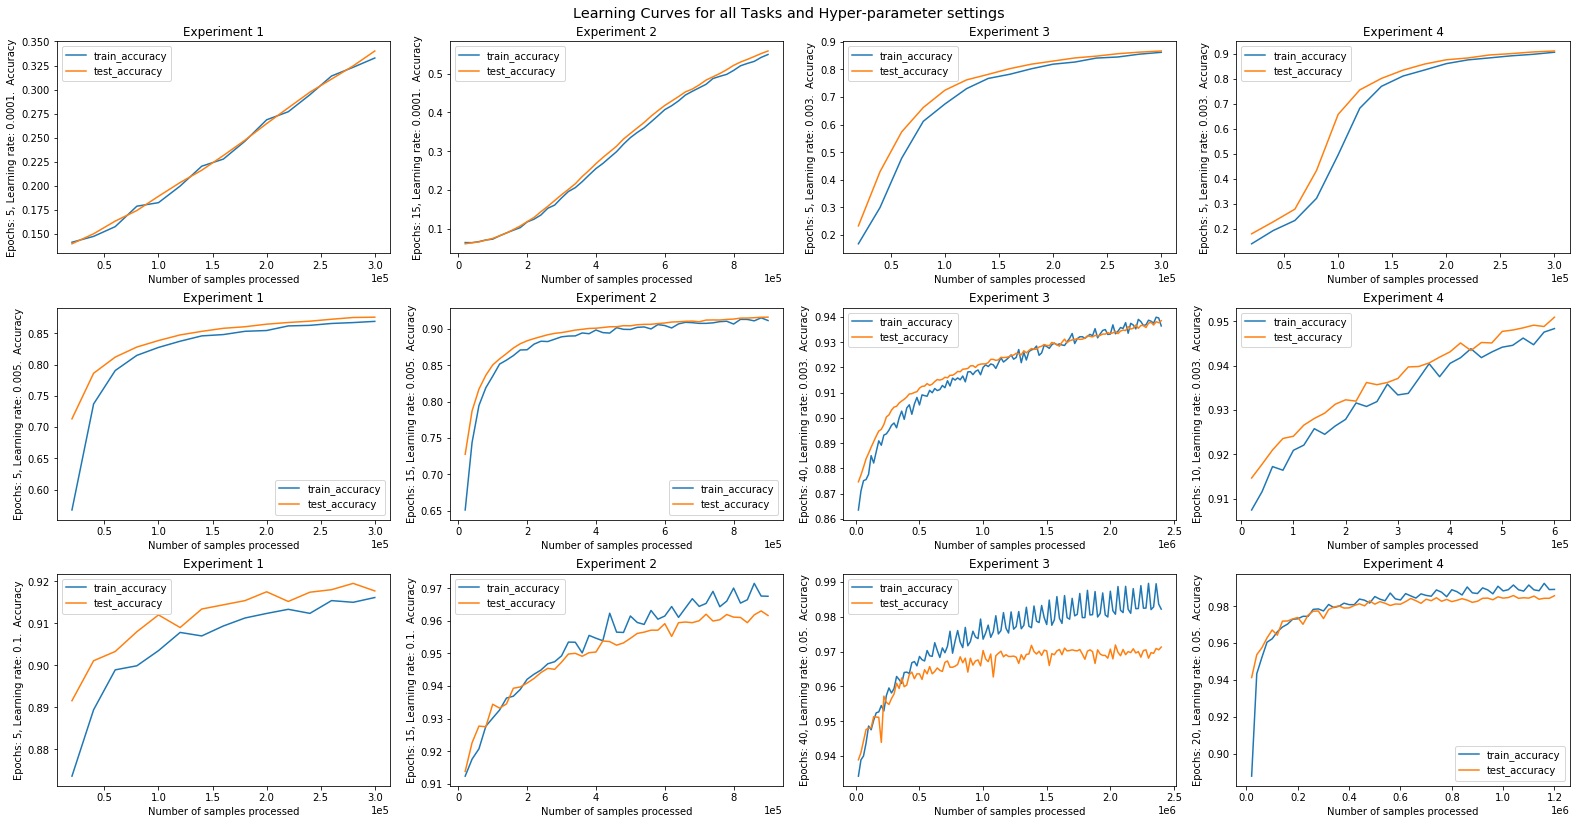

In [7]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

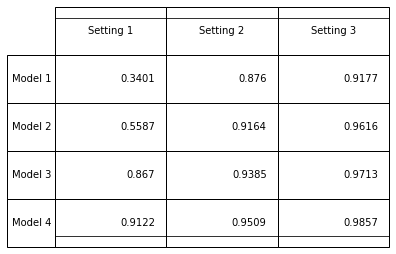

In [8]:
# Print final test accuracies
plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

### A1 Over-fitting

Setting 3 of Model 3. Test accuracy is not increasing anymore, while the training accuracy is higher than the test accuracy. Due to the high number of epochs the model is fitted too closely to training data. The 3rd settings of models 2 and 3 might also be already an overfit.

### A2 Under-fitting

Setting 1 of Model 1 and 2, since the test accuracy is still increasing. A very small step size only changes the model slowly. This can be seen in Setting 2 of those models: increasing the step size benefits here. Also Setting 1 and 2 of Model 3 and 4. Since the second settings have the same step size, one can clearly see that they benifit of increasing the number of epochs.

### A3 How to prevent?

Basically choosing step size and epochs apropriately.

Underfitting:

A linear improvement of the accuracy can best be improved by increasing the step size, since increasing the number of epochs is more expensive (i.e. Model 1 and 2). When the curve already flattens it is safer to increase the number of epochs until no further improvement can be observed. Increasing the step size further can lead to an overfitted model as can be seen in Model 3 between Settings 2 and 3.

Overfitting:

Choose a lower number of epochs or a smaller step size.

In general I would start with a low number of epochs and a small step size. Then increase the step size until some flattening in the curve occures and afterwards increase the number of epochs until no further improvement in the test accuracy is observable.